In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,5

In [2]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Forecasting with Holts Winter/Triple Exponential Smoothing


In [6]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/harkiratchahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/harkiratchahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [15]:
# forecasting over the 36 months (3 years)
test_predictions=fitted_model.forecast(36).rename('HW Forecast')

/Users/harkiratchahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [16]:
test_predictions

1958-02-01    339.142806
1958-03-01    399.281512
1958-04-01    394.233446
1958-05-01    402.545125
1958-06-01    473.128618
1958-07-01    521.795119
1958-08-01    514.513419
1958-09-01    446.216588
1958-10-01    385.430720
1958-11-01    339.644899
1958-12-01    381.455413
1959-01-01    401.209905
1959-02-01    387.158882
1959-03-01    455.812067
1959-04-01    450.049293
1959-05-01    459.537745
1959-06-01    540.114497
1959-07-01    595.671236
1959-08-01    587.358588
1959-09-01    509.392244
1959-10-01    440.000270
1959-11-01    387.732060
1959-12-01    435.462136
1960-01-01    458.013483
1960-02-01    441.973106
1960-03-01    520.346257
1960-04-01    513.767586
1960-05-01    524.599420
1960-06-01    616.584285
1960-07-01    680.006785
1960-08-01    670.517227
1960-09-01    581.512353
1960-10-01    502.295815
1960-11-01    442.627436
1960-12-01    497.115169
1961-01-01    522.859351
Freq: MS, Name: HW Forecast, dtype: float64

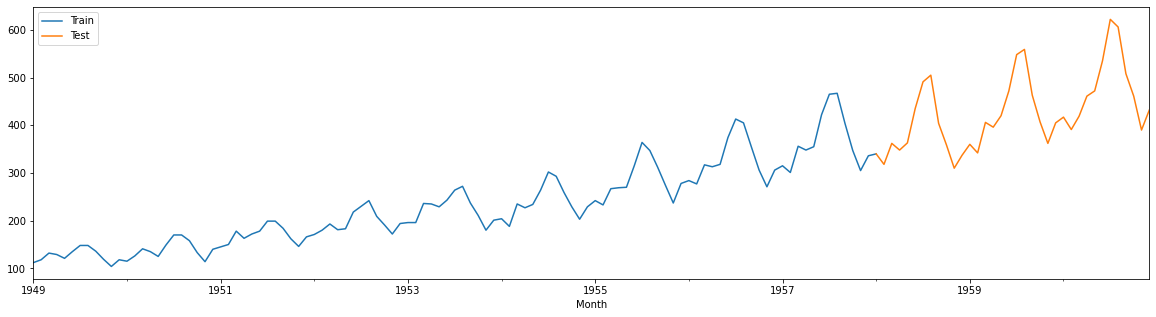

In [17]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test');

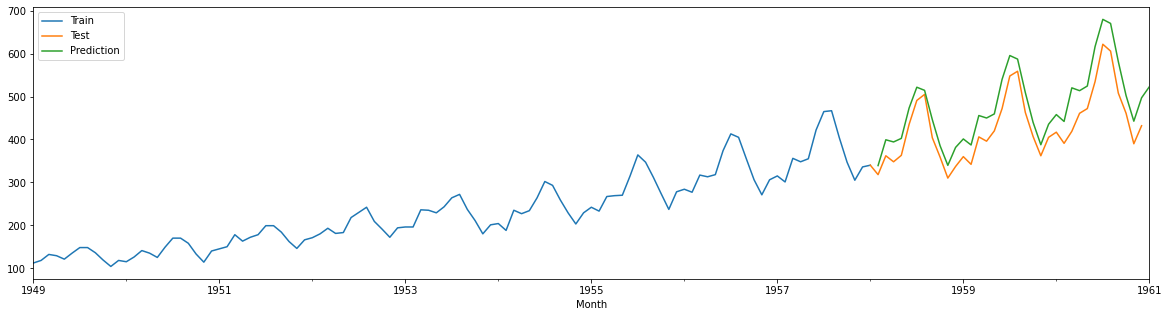

In [18]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Prediction');

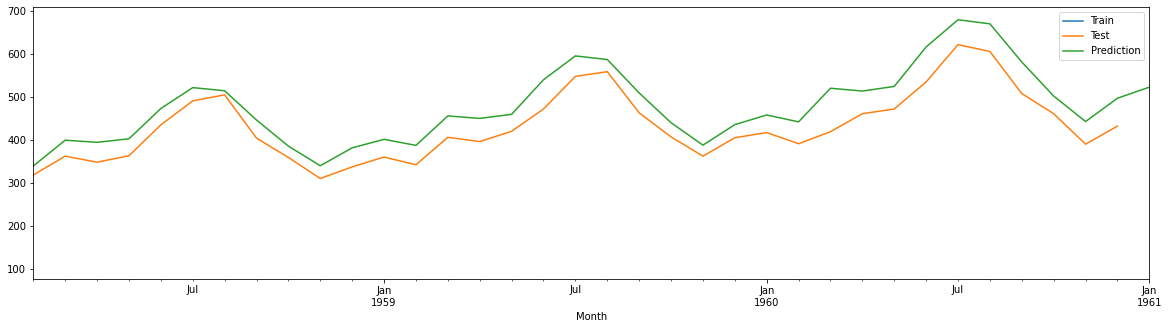

In [19]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Prediction', xlim=['1958-02-01', '1961-01-01']);

## Evaluation Metrics

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(test_data, test_predictions)

63.03095780815246

In [22]:
mean_squared_error(test_data, test_predictions)

5614.214587915569

In [23]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92806275298707

# Stationarity

In [24]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/samples.csv', parse_dates=True, index_col=0)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


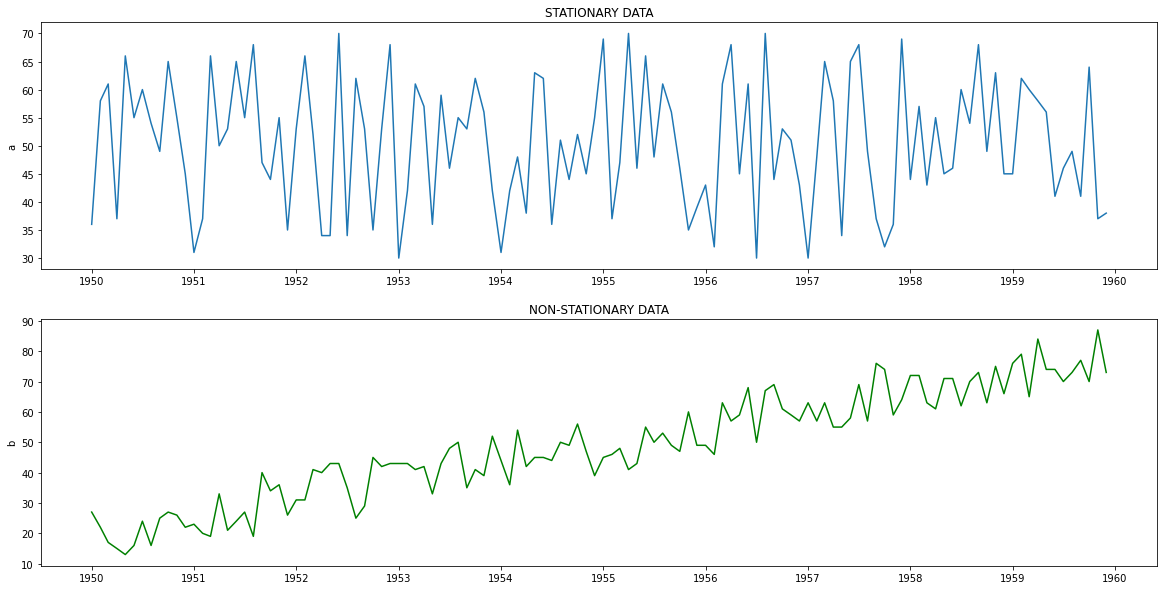

In [31]:
fig,ax=plt.subplots(2,1, figsize=(20,10))
ax1,ax2=ax.flatten()

sns.lineplot(x=df.index, y=df['a'], ax=ax1)
ax1.set_title('STATIONARY DATA')

sns.lineplot(x=df.index, y=df['b'], ax=ax2, color='g')
ax2.set_title('NON-STATIONARY DATA');

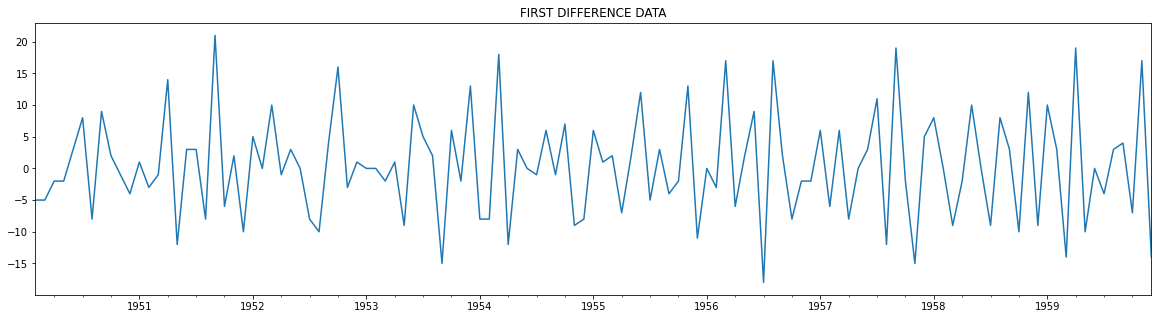

In [33]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['b'],k_diff=1)

df['d1'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True);